# **Waste Material Segregation for Improving Waste Management**

## **Objective**

This project aims to build an intelligent waste material classification system using **Convolutional Neural Networks (CNNs)**. By automatically sorting waste into specific categories, the system supports more effective recycling, reduces environmental impact, and encourages sustainable waste management.

### Main Goals:

- Develop a model that reliably classifies waste into categories such as **cardboard, glass, paper, plastic**, and others.
- Enhance the efficiency of waste segregation processes to reduce landfill dependency and increase recycling rates.
- Leverage image-based learning to better understand material characteristics, helping optimize sorting workflows for long-term sustainability.

## **Data Understanding**

The dataset is composed of images representing various types of commonly discarded waste materials. Each image is labeled and categorized into one of the following **seven classes**:

1. **Food Waste**  
2. **Metal**  
3. **Paper**  
4. **Plastic**  
5. **Other**  
6. **Cardboard**  
7. **Glass**  

These categories are typically assigned based on the **folder names** in the dataset directory, following a standard structure for supervised image classification tasks.

The dataset reflects a **real-world class imbalance**, where certain waste types (e.g., **Plastic**) are overrepresented, while others like **Cardboard** appear less frequently. This imbalance presents a challenge during model training, as it can lead to biased predictions favoring the majority classes.

To handle this, **data augmentation techniques** were later applied to artificially increase the diversity and frequency of minority classes, helping the model learn more robust representations across all categories.

## **Data Description**

- The dataset is organized into multiple folders, where each folder represents a distinct **waste category**, such as `Cardboard`, `Food_Waste`, `Metal`, and others.
- Each folder contains numerous images that depict objects associated with that category.
- The dataset does **not include subcategories** within each main class.  
  For example, the `Food_Waste` folder may contain various items like **coffee grounds**, **teabags**, and **fruit peels**, but these are all labeled simply as "Food Waste" without further differentiation.
  
This flat labeling structure simplifies classification into broad categories but also poses a challenge, as visually diverse items are grouped under the same label.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
!pip install tensorflow==2.19.0 keras==3.9.2

In [ ]:
!pip install opencv-python

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logs


import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import math
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import zipfile
import cv2

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("sklearn version:", sklearn.__version__)


numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2
sklearn version: 1.5.1


In [ ]:
# Import essential libraries

import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.19.0
3.9.2


In [ ]:
print("Current directory:", os.getcwd())
print("Contents:", os.listdir())

Current directory: C:\Users\hp\Desktop\Data Science\Main course\Module 3- Deep Learning\Case study
Contents: ['.ipynb_checkpoints', 'best_model.h5', 'CNN_Assg_Waste_Segregation_Starter (1).ipynb', 'CNN_Assg_Waste_Segregation_Starter.ipynb', 'CNN_Assg_Waste_Segregation_Starter_Final.ipynb', 'data.zip', 'final_collab.ipynb', 'google_collab_solution (1).ipynb', 'google_collab_solution.ipynb']


Load the dataset.

In [ ]:
# Load and unzip the dataset

import zipfile
import os

zippath = r"C:\Users\hp\Desktop\Data Science\Main course\Module 3- Deep Learning\Case study\data.zip"

extract_path = "CNN Assignment/"
target_folder = os.path.join(extract_path, "data")

if not os.path.exists(zippath):
    print(f"Zip file not found at {zippath}. Please check the path.")
else:
    if os.path.exists(target_folder):
        print(f"Directory {target_folder} already exists. Please remove it before extracting.")
    else:
        with zipfile.ZipFile(zippath, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Dataset successfully extracted to {extract_path}")


Dataset successfully extracted to CNN Assignment/


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [ ]:
# Create a function to load the raw images


def load_images_from_folder(folder, image_size=(128, 128)):
    images = []
    labels = []


    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)


        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                if filename.endswith(('.jpg', '.png')):
                    img = Image.open(os.path.join(label_folder, filename))
                    img = img.resize(image_size)
                    images.append(np.array(img))
                    labels.append(label)

    return np.array(images), np.array(labels)



#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
data_path = os.path.join(extract_path, 'data')
data_path

'CNN Assignment/data'

In [ ]:
# Get the images and their labels

images, labels = load_images_from_folder(data_path)
print(images.shape)
print(labels)

(7625, 128, 128, 3)
['Cardboard' 'Cardboard' 'Cardboard' ... 'Plastic' 'Plastic' 'Plastic']


In [ ]:

folder = data_path
category_counts = {} #dict

for subfolder in os.listdir(folder):
    path = os.path.join(folder, subfolder)
    if os.path.isdir(path):
        count = len(os.listdir(path))
        category_counts[subfolder] = count

print(category_counts)

{'Cardboard': 540, 'Food_Waste': 1000, 'Glass': 750, 'Metal': 1000, 'Other': 1010, 'Paper': 1030, 'Plastic': 2295}


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

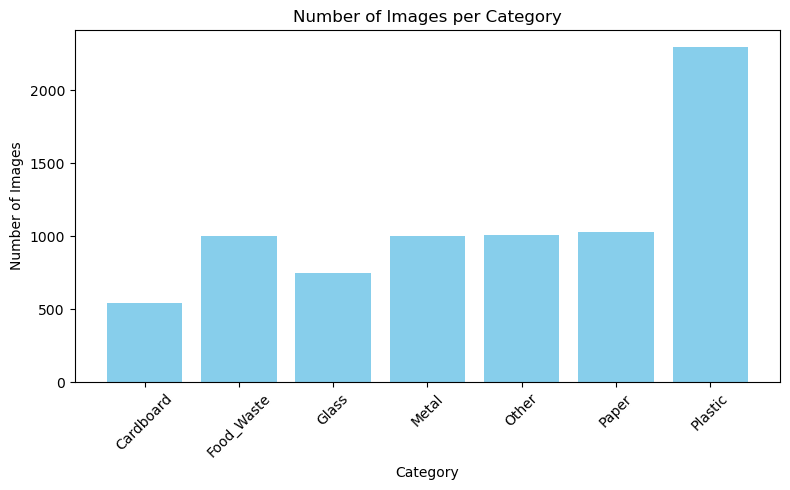

In [ ]:
# Visualise Data Distribution

categories = list(category_counts.keys())
counts = list(category_counts.values())


plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color='skyblue')
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

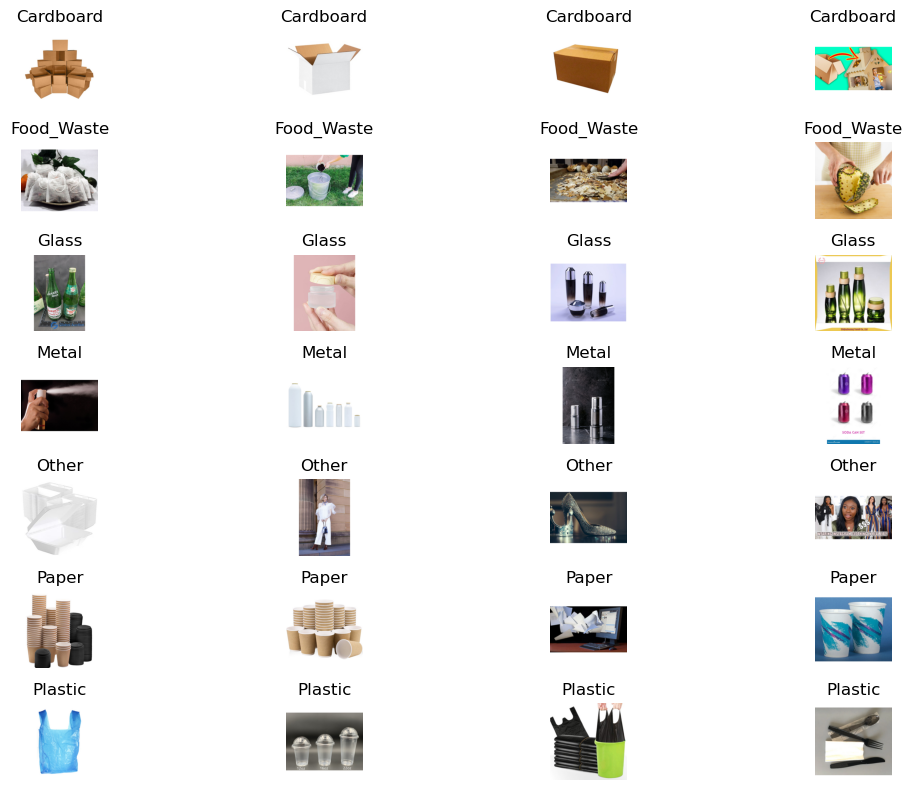

In [ ]:
# Visualise Sample Images (across different labels)



folder = data_path
categories = list(category_counts.keys())
counts = list(category_counts.values())

sample_images = []
sample_labels = []

samples_per_category = 4

for category in categories:
    category_folder = os.path.join(folder, category)

    if os.path.isdir(category_folder):
        image_files = [f for f in os.listdir(category_folder) if f.endswith(('.jpg', '.png'))]
        selected_images = random.sample(image_files, samples_per_category)

        for image_file in selected_images:
            img_path = os.path.join(category_folder, image_file)
            img = Image.open(img_path)
            sample_images.append(img)
            sample_labels.append(category)


plt.figure(figsize=(12, 8))

for i, (img, label) in enumerate(zip(sample_images, sample_labels)):
    plt.subplot(len(category_counts), samples_per_category, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)


plt.tight_layout()
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [ ]:
# Find the smallest and largest image dimensions from the data set

folder = data_path

min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0

for subfolder in os.listdir(folder):
    category_folder = os.path.join(folder, subfolder)

    if os.path.isdir(category_folder):
        for filename in os.listdir(category_folder):
            if filename.lower().endswith(('.jpg', '.png')):
                img_path = os.path.join(category_folder, filename)

                try:
                    with Image.open(img_path) as img:
                        width, height = img.size

                        if width < min_width:
                            min_width = width
                        if height < min_height:
                            min_height = height

                        if width > max_width:
                            max_width = width
                        if height > max_height:
                            max_height = height
                except:
                    print(f"Couldn't open image: {img_path}")

print(f"Smallest Image Dimensions: {min_width} x {min_height}")
print(f"Largest Image Dimensions: {max_width} x {max_height}")



Smallest Image Dimensions: 256 x 256
Largest Image Dimensions: 256 x 256


In [ ]:
# Resize the image dimensions

def resize_images(data_path, output_path, target_size=(128, 128)):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for category_folder in os.listdir(data_path):
        category_path = os.path.join(data_path, category_folder)
        output_category_path = os.path.join(output_path, category_folder)

        if os.path.isdir(category_path):
            if not os.path.exists(output_category_path):
                os.makedirs(output_category_path)

            for filename in os.listdir(category_path):
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    img_path = os.path.join(category_path, filename)
                    output_img_path = os.path.join(output_category_path, filename)

                    with Image.open(img_path) as img:
                        img_resized = img.resize(target_size)
                        img_resized.save(output_img_path)

    print(f"Images resized and saved to {output_path}")

In [ ]:
output_path = os.path.join(extract_path, 'resized_data')
resize_images(data_path, output_path, target_size=(128, 128))

Images resized and saved to CNN Assignment/resized_data


In [ ]:
images, labels = load_images_from_folder(output_path)
print(images.shape)
print(labels)

(7625, 128, 128, 3)
['Cardboard' 'Cardboard' 'Cardboard' ... 'Plastic' 'Plastic' 'Plastic']


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# Encode the labels suitably
from tensorflow.keras.utils import to_categorical

unique_labels, encoded_labels = np.unique(labels, return_inverse=True)

one_hot_labels = to_categorical(encoded_labels)

print("Unique Labels:", unique_labels)
print("Encoded Labels:", encoded_labels)
print("One-Hot Encoded Labels:\n", one_hot_labels)

Unique Labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Encoded Labels: [0 0 0 ... 6 6 6]
One-Hot Encoded Labels:
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images, one_hot_labels, test_size=0.3, stratify=labels, random_state=42)


print(f"Training set shape: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Validation set shape: X_val shape = {X_val.shape}, y_val shape = {y_val.shape}")

Training set shape: X_train shape = (5337, 128, 128, 3), y_train shape = (5337, 7)
Validation set shape: X_val shape = (2288, 128, 128, 3), y_val shape = (2288, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

print(input_shape)
print(num_classes)

(128, 128, 3)
7


In [ ]:
# Build and compile the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall

def build_model(input_shape, num_classes):
    model = Sequential()

    # Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    # Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    # Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Flatten the output
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(), Recall()]
    )

    return model


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]


In [ ]:
# Training

X_train=X_train / 255.0
X_val=X_val / 255.0

model_no_aug = build_model(input_shape=X_train.shape[1:], num_classes=y_train.shape[1])

history_no_aug = model_no_aug.fit(
    X_train, y_train,
    validation_data=(X_val , y_val),
    epochs=25,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2717 - loss: 2.4899 - precision_3: 0.3052 - recall_3: 0.1740
Epoch 1: val_loss improved from inf to 2.70766, saving model to best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.2719 - loss: 2.4884 - precision_3: 0.3055 - recall_3: 0.1742 - val_accuracy: 0.3011 - val_loss: 2.7077 - val_precision_3: 0.3189 - val_recall_3: 0.2955 - learning_rate: 0.0010
Epoch 2/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3880 - loss: 1.7753 - precision_3: 0.4721 - recall_3: 0.2439
Epoch 2: val_loss improved from 2.70766 to 1.81075, saving model to best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.3880 - loss: 1.7750 - precision_3: 0.4722 - recall_3: 0.2440 - val_accuracy: 0.2430 - val_loss: 1.8107 - val_precision_3: 0.4906 - val_recall_3: 0.0682 - learning_rate: 0.0010
Epoch 3/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4539 - loss: 1.5654 - precision_3: 0.5577 - recall_3: 0.2981
Epoch 3: val_loss did not improve from 1.81075
167/167 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.4539 - loss: 1.5655 - precision_3: 0.5577 - recall_3: 0.2981 - val_accuracy: 0.2928 - val_loss: 1.9642 - val_precision_3: 0.3699 - val_recall_3: 0.1888 - learning_rate: 0.0010
Epoch 4/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4948 - loss: 1.3946 - precision_3: 0.6185 - recall_3: 0.3342
Epoch 4: val_loss improved from 1.81075 to 1.70478, saving model to best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.4948 - loss: 1.3945 - precision_3: 0.6186 - recall_3: 0.3343 - val_accuracy: 0.3885 - val_loss: 1.7048 - val_precision_3: 0.4260 - val_recall_3: 0.3160 - learning_rate: 0.0010
Epoch 5/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5542 - loss: 1.2281 - precision_3: 0.6816 - recall_3: 0.4001
Epoch 5: val_loss improved from 1.70478 to 1.67677, saving model to best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.5541 - loss: 1.2283 - precision_3: 0.6816 - recall_3: 0.4001 - val_accuracy: 0.4510 - val_loss: 1.6768 - val_precision_3: 0.5241 - val_recall_3: 0.3654 - learning_rate: 0.0010
Epoch 6/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6052 - loss: 1.0997 - precision_3: 0.7169 - recall_3: 0.4523
Epoch 6: val_loss did not improve from 1.67677
167/167 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.6051 - loss: 1.0999 - precision_3: 0.7169 - recall_3: 0.4523 - val_accuracy: 0.2072 - val_loss: 3.4368 - val_precision_3: 0.2064 - val_recall_3: 0.1954 - learning_rate: 0.0010
Epoch 7/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6085 - loss: 1.0815 - precision_3: 0.7289 - recall_3: 0.4760
Epoch 7: val_loss did not improve from 1.67677
167/167 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6084 - loss: 1.0820 - precision_3: 0.7288 - recall_3: 0.4758 - val_accuracy: 0.3982 - val_loss: 3.3711 - val_precision_3: 0.4095 - val

167/167 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.6313 - loss: 1.0469 - precision_3: 0.7412 - recall_3: 0.4896 - val_accuracy: 0.4707 - val_loss: 1.6324 - val_precision_3: 0.5327 - val_recall_3: 0.4095 - learning_rate: 0.0010
Epoch 9/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6679 - loss: 0.9309 - precision_3: 0.7736 - recall_3: 0.5516
Epoch 9: val_loss improved from 1.63236 to 1.49699, saving model to best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.6679 - loss: 0.9311 - precision_3: 0.7735 - recall_3: 0.5516 - val_accuracy: 0.4541 - val_loss: 1.4970 - val_precision_3: 0.6334 - val_recall_3: 0.2802 - learning_rate: 0.0010
Epoch 10/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7226 - loss: 0.7753 - precision_3: 0.8115 - recall_3: 0.6194
Epoch 10: val_loss improved from 1.49699 to 1.21401, saving model to best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.7227 - loss: 0.7752 - precision_3: 0.8115 - recall_3: 0.6195 - val_accuracy: 0.5966 - val_loss: 1.2140 - val_precision_3: 0.6807 - val_recall_3: 0.5162 - learning_rate: 0.0010
Epoch 11/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7978 - loss: 0.5989 - precision_3: 0.8545 - recall_3: 0.7283
Epoch 11: val_loss did not improve from 1.21401
167/167 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.7977 - loss: 0.5991 - precision_3: 0.8544 - recall_3: 0.7283 - val_accuracy: 0.4292 - val_loss: 1.7985 - val_precision_3: 0.5120 - val_recall_3: 0.3536 - learning_rate: 0.0010
Epoch 12/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8030 - loss: 0.5718 - precision_3: 0.8648 - recall_3: 0.7465
Epoch 12: val_loss did not improve from 1.21401
167/167 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8028 - loss: 0.5724 - precision_3: 0.8646 - recall_3: 0.7463 - val_accuracy: 0.3615 - val_loss: 2.2655 - val_precision_3: 0.4075 -

167/167 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.8954 - loss: 0.3141 - precision_3: 0.9166 - recall_3: 0.8674 - val_accuracy: 0.6573 - val_loss: 1.2089 - val_precision_3: 0.7036 - val_recall_3: 0.6224 - learning_rate: 5.0000e-04
Epoch 16/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9234 - loss: 0.2262 - precision_3: 0.9402 - recall_3: 0.9037
Epoch 16: val_loss did not improve from 1.20891
167/167 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9234 - loss: 0.2262 - precision_3: 0.9402 - recall_3: 0.9037 - val_accuracy: 0.6434 - val_loss: 1.2158 - val_precision_3: 0.6986 - val_recall_3: 0.5997 - learning_rate: 5.0000e-04
Epoch 17/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9428 - loss: 0.1785 - precision_3: 0.9561 - recall_3: 0.9275
Epoch 17: val_loss did not improve from 1.20891
167/167 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.9428 - loss: 0.1785 - precision_3: 0.9561 - recall_3: 0.9275 - val_accuracy: 0.6665 - val_loss: 1.2315 - val_precision_3: 

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step
Classification Report for Validation Set:
              precision    recall  f1-score   support

   Cardboard       0.93      0.62      0.74       162
  Food_Waste       0.75      0.66      0.70       300
       Glass       0.74      0.51      0.60       225
       Metal       0.68      0.63      0.65       300
       Other       0.64      0.42      0.50       303
       Paper       0.68      0.58      0.63       309
     Plastic       0.58      0.87      0.70       689

    accuracy                           0.66      2288
   macro avg       0.71      0.61      0.65      2288
weighted avg       0.68      0.66      0.65      2288



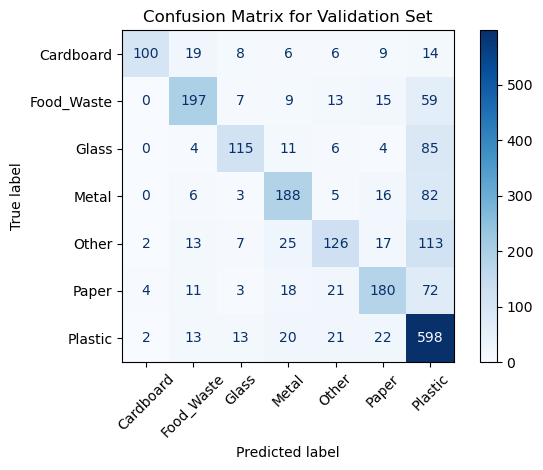

In [ ]:
# Evaluate on the test set; display suitable metrics

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the validation set
y_pred = model_no_aug.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification Report for validation set
print("Classification Report for Validation Set:")
print(classification_report(y_true_classes, y_pred_classes, target_names=unique_labels))

# Confusion Matrix for validation set
cm = confusion_matrix(y_true_classes, y_pred_classes, labels=np.arange(num_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for Validation Set")
plt.tight_layout()
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

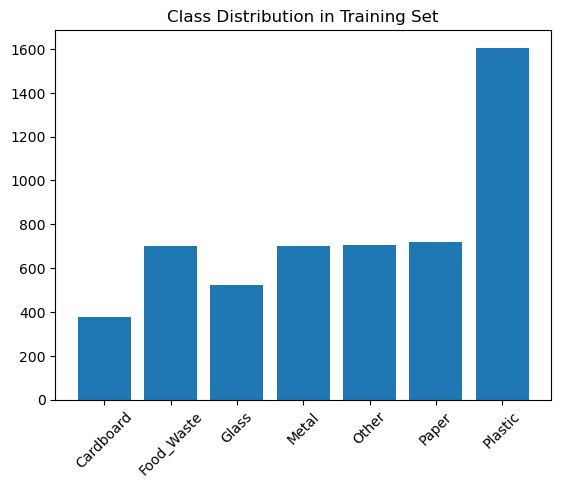

In [ ]:
# Define augmentation steps to augment images



import numpy as np
import matplotlib.pyplot as plt

class_counts = np.sum(y_train, axis=0)
plt.bar(range(len(class_counts)), class_counts)
plt.xticks(range(len(class_counts)), unique_labels, rotation=45)
plt.title("Class Distribution in Training Set")
plt.show()

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images


from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=7,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)

class_weights = dict(enumerate(class_weights))

In [ ]:
# Create the augmented training dataset

model_aug = build_model(input_shape=X_train.shape[1:], num_classes=y_train.shape[1])

history_aug = model_aug.fit(
    datagen.flow(X_train, y_train, batch_size=32,seed=42),
    validation_data=(X_val, y_val),
    epochs=45,
    callbacks=callbacks,
    verbose=1,
    class_weight=class_weights
)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2419 - loss: 2.5408 - precision_4: 0.2657 - recall_4: 0.1542
Epoch 1: val_loss did not improve from 1.20891
167/167 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.2420 - loss: 2.5395 - precision_4: 0.2659 - recall_4: 0.1543 - val_accuracy: 0.2067 - val_loss: 2.7214 - val_precision_4: 0.2410 - val_recall_4: 0.1049 - learning_rate: 0.0010
Epoch 2/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3270 - loss: 1.8837 - precision_4: 0.3943 - recall_4: 0.1829
Epoch 2: val_loss did not improve from 1.20891
167/167 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.3270 - loss: 1.8834 - precision_4: 0.3945 - recall_4: 0.1829 - val_accuracy: 0.1294 - val_loss: 2.4533 - val_precision_4: 0.1480 - val_recall_4: 0.0883 - learning_rate: 0.0010
Epoch 3/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3513 - loss: 1.6962 - precision_4: 0.4617 - recall_4: 0.2064
Epoch 3: val_loss did not improve from 1.20891
167/167 ━━━━━━━━━

167/167 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.6680 - loss: 0.8429 - precision_4: 0.7692 - recall_4: 0.5580 - val_accuracy: 0.5975 - val_loss: 1.1990 - val_precision_4: 0.6953 - val_recall_4: 0.4777 - learning_rate: 5.0000e-04
Epoch 17/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6938 - loss: 0.7744 - precision_4: 0.7843 - recall_4: 0.5837
Epoch 17: val_loss did not improve from 1.19901
167/167 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6937 - loss: 0.7746 - precision_4: 0.7842 - recall_4: 0.5836 - val_accuracy: 0.5184 - val_loss: 1.5928 - val_precision_4: 0.6049 - val_recall_4: 0.4611 - learning_rate: 5.0000e-04
Epoch 18/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6980 - loss: 0.7887 - precision_4: 0.7926 - recall_4: 0.6015
Epoch 18: val_loss did not improve from 1.19901
167/167 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.6979 - loss: 0.7888 - precision_4: 0.7925 - recall_4: 0.6014 - val_accuracy: 0.5642 - val_loss: 1.4522 - val_precision_4: 

167/167 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.7296 - loss: 0.6672 - precision_4: 0.8188 - recall_4: 0.6415 - val_accuracy: 0.6381 - val_loss: 1.0651 - val_precision_4: 0.7206 - val_recall_4: 0.5647 - learning_rate: 2.5000e-04
Epoch 21/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7474 - loss: 0.6181 - precision_4: 0.8302 - recall_4: 0.6658
Epoch 21: val_loss did not improve from 1.06512
167/167 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7474 - loss: 0.6181 - precision_4: 0.8302 - recall_4: 0.6658 - val_accuracy: 0.6407 - val_loss: 1.0928 - val_precision_4: 0.7367 - val_recall_4: 0.5625 - learning_rate: 2.5000e-04
Epoch 22/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7639 - loss: 0.5828 - precision_4: 0.8350 - recall_4: 0.6942
Epoch 22: val_loss did not improve from 1.06512
167/167 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7639 - loss: 0.5829 - precision_4: 0.8349 - recall_4: 0.6942 - val_accuracy: 0.6171 - val_loss: 1.1385 - val_precision_4: 

167/167 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.7623 - loss: 0.5783 - precision_4: 0.8355 - recall_4: 0.6838 - val_accuracy: 0.6901 - val_loss: 0.9685 - val_precision_4: 0.7547 - val_recall_4: 0.6307 - learning_rate: 2.5000e-04
Epoch 24/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7791 - loss: 0.5543 - precision_4: 0.8409 - recall_4: 0.7169
Epoch 24: val_loss did not improve from 0.96848
167/167 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7791 - loss: 0.5544 - precision_4: 0.8408 - recall_4: 0.7168 - val_accuracy: 0.6691 - val_loss: 1.0749 - val_precision_4: 0.7201 - val_recall_4: 0.6163 - learning_rate: 2.5000e-04
Epoch 25/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7967 - loss: 0.5098 - precision_4: 0.8576 - recall_4: 0.7334
Epoch 25: val_loss did not improve from 0.96848
167/167 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.7967 - loss: 0.5099 - precision_4: 0.8576 - recall_4: 0.7334 - val_accuracy: 0.6591 - val_loss: 1.0490 - val_precision_4: 

167/167 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.8013 - loss: 0.4954 - precision_4: 0.8486 - recall_4: 0.7438 - val_accuracy: 0.7063 - val_loss: 0.9240 - val_precision_4: 0.7675 - val_recall_4: 0.6565 - learning_rate: 1.2500e-04
Epoch 28/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8150 - loss: 0.4520 - precision_4: 0.8623 - recall_4: 0.7676
Epoch 28: val_loss did not improve from 0.92404
167/167 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.8150 - loss: 0.4520 - precision_4: 0.8623 - recall_4: 0.7676 - val_accuracy: 0.6630 - val_loss: 1.0549 - val_precision_4: 0.7248 - val_recall_4: 0.6158 - learning_rate: 1.2500e-04
Epoch 29/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8123 - loss: 0.4590 - precision_4: 0.8591 - recall_4: 0.7615
Epoch 29: val_loss did not improve from 0.92404
167/167 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.8124 - loss: 0.4589 - precision_4: 0.8591 - recall_4: 0.7615 - val_accuracy: 0.7054 - val_loss: 0.9680 - val_precision_4: 

##### **4.1.2**

Train the model on the new augmented dataset.

72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step


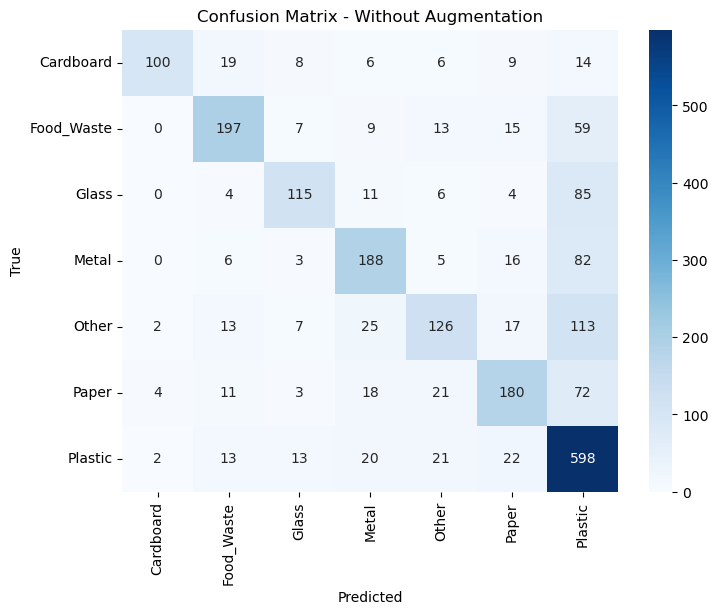

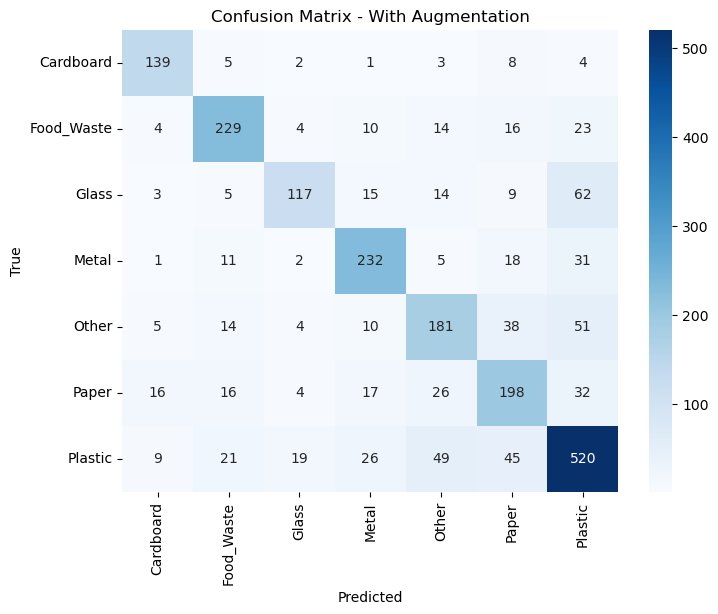

In [ ]:
# Train the model using augmented images

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model_no_aug.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

y_pred1 = model_aug.predict(X_val)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_true_classes1 = np.argmax(y_val, axis=1)

# Compute confusion matrices
cm1 = confusion_matrix(y_true_classes, y_pred_classes)
cm2 = confusion_matrix(y_true_classes1, y_pred_classes1)

def plot_conf_matrix(cm, title, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_conf_matrix(cm1, 'Confusion Matrix - Without Augmentation', unique_labels)
plot_conf_matrix(cm2, 'Confusion Matrix - With Augmentation', unique_labels)



In [ ]:
print("Classification Report for Validation Set before augmentation:")
print(classification_report(y_true_classes, y_pred_classes, target_names=unique_labels))

print("Classification Report for Validation Set after augmentation:")
print(classification_report(y_true_classes1, y_pred_classes1, target_names=unique_labels))

Classification Report for Validation Set before augmentation:
              precision    recall  f1-score   support

   Cardboard       0.93      0.62      0.74       162
  Food_Waste       0.75      0.66      0.70       300
       Glass       0.74      0.51      0.60       225
       Metal       0.68      0.63      0.65       300
       Other       0.64      0.42      0.50       303
       Paper       0.68      0.58      0.63       309
     Plastic       0.58      0.87      0.70       689

    accuracy                           0.66      2288
   macro avg       0.71      0.61      0.65      2288
weighted avg       0.68      0.66      0.65      2288

Classification Report for Validation Set after augmentation:
              precision    recall  f1-score   support

   Cardboard       0.79      0.86      0.82       162
  Food_Waste       0.76      0.76      0.76       300
       Glass       0.77      0.52      0.62       225
       Metal       0.75      0.77      0.76       300
       Ot

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

---

## 🧾 Dataset Composition

- The dataset contains images from **7 waste categories**:
  **Cardboard, Food_Waste, Glass, Metal, Paper, Plastic,** and **Other**.
- Images are stored in class-specific folders.
- Format: `.png` files resized to a consistent **128×128×3** resolution to ensure uniform input shape for the CNN.

### 🧮 Class Distribution

- The dataset is **imbalanced**:
  - **Plastic** has the highest number of samples (~2295).
  - **Cardboard** is the least represented (~540).
- This imbalance can bias the model toward the majority classes and reduce its ability to learn minority class features effectively.

### 🧪 Label Encoding

- Labels were extracted directly from folder names.
- **One-hot encoding** was used to prepare the target labels for multi-class classification.

---

## 🧪 Data Splitting

- The dataset was divided using a **70:30 train-validation split**.
- **Stratified sampling** was applied to preserve class distribution in both subsets.

### ⚠️ Challenges

- Severe class imbalance could lead to **biased learning**.
- Some classes (e.g., *Plastic* vs. *Food_Waste*) have **similar visual features**, making them harder to distinguish.

---

## 🧠 Model Architecture

### 🔹 Model Type

- A custom **Convolutional Neural Network (CNN)** implemented using `Keras Sequential`.

### 🔹 Convolutional Layers

- The model uses **3 convolutional blocks**, each consisting of:
  ```plaintext
  Conv2D → BatchNormalization → MaxPooling2D → Dropout
